<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/CNN_Dogs_and_Cats_Image_Augmentation_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#이미지 증강(Image Augmentation)을 사용하여 CNN 학습
Overfitting 대응책책

In [2]:
import warnings 
warnings.filterwarnings('ignore')

## 0.import Keras

In [5]:
import keras 
keras.__version__

'2.4.3'

## 1.Google Drive Mount
* 'dogs_and_cats_small.zip' 디렉토리를 구글드라이브에 업로드

In [6]:
from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


### 1) 구글 드라이브 마운트 결과 확인

In [7]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  4 04:51 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


### 2) unzip 'dogs_and_cats_small.zip'

In [8]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [9]:
!ls -l

total 20
drwx------ 5 root root 4096 Mar 23 05:40 drive
drwxr-xr-x 1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 4 root root 4096 Mar 23 05:40 test
drwxr-xr-x 4 root root 4096 Mar 23 05:40 train
drwxr-xr-x 4 root root 4096 Mar 23 05:40 validation


### 3)Image Augmentation Test - [Optional] 
* rotation_range = 40 : 0도에서 40도 사이에서 임의의 각도록 회전 
* width_shift_range = 0.2 : 20% 픽셀 내외로 좌우 이동 
* height_shift_range = 0.2 : 20% 픽셀 내외로 상하 이동 
* shear_range = 0.2 : 0.2 라디안 내외로 시계 반대방향으로 변형 
* zoom_range = 0.2 : 80%에서 120% 범위에서 확대/축소 
* horizontal_flip = True : 수평방향 뒤집기
* vertical_flit = True : 수직방향 뒤집기
* fill_mode = 'nearest': 주변 픽셀로 이미지 채우기

In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 40, 
                             width_shift_range = 0.2, 
                             height_shift_range = 0.2, 
                             shear_range = 0.2, 
                             zoom_range = 0.2, 
                             horizontal_flip = True, 
                             vertical_flip = True, 
                             fill_mode = 'nearest')

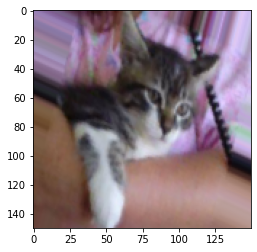

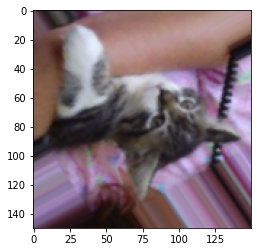

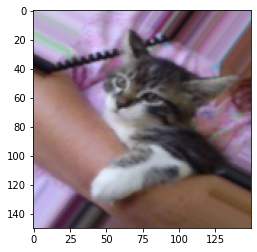

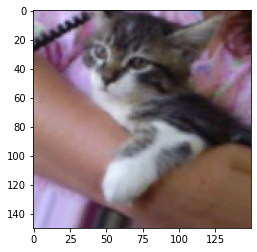

In [11]:
from keras.preprocessing import image 
import matplotlib.pyplot as plt 
import os

train_cats_dir = train_dir = os.path.join('train', 'cats') 
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 테스트 이미지 선택 
img_path = fnames[77]

# 이미지 읽고 크기 변경 
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 배열 변환 
x = image.img_to_array(img)

# (1, 150, 150, 3) 변환 
x = x.reshape((1,) + x.shape)

# 랜덤하게 변환된 이미지 배치 생성 
i = 0

for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0])) 
  i += 1 
  if i % 4 == 0: 
    break
    
plt.show()

## 2.Data Preprocessing

### 1) Image_File Directory Setting
* train_dir 
* valid_dir 
* test_dir

In [12]:
train_dir = 'train' 
valid_dir = 'validation' 
test_dir = 'test'

### 2) ImageDataGenerator( ) & flow_from_directory()
* Normalization & Augmentation 
  * ImageDataGenerator( )
* Resizing & Generator 
  * flow_from_directory()

In [13]:
from keras.preprocessing.image import ImageDataGenerator 

# With Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   rotation_range = 40, 
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip=True, 
                                   vertical_flip = True, 
                                   fill_mode = 'nearest')

# Without Augmentation
valid_datagen = ImageDataGenerator(rescale = 1./255) 

# With Augmentation
train_generator = train_datagen.flow_from_directory( 
    train_dir,
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

# Without Augmentation
valid_generator = valid_datagen.flow_from_directory( 
    valid_dir,
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 3.CNN Keras Modeling

### 1) Model Define
* Feature Extraction & Classification
  * Dropout Layer

In [14]:
from keras import layers 
from keras import models

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation = 'relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation = 'relu')) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation = 'relu')) 
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### 2) Model Compile
* 모델 학습방법 설정정

In [15]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

### 3) Model Fit
* 약 30분
  * epochs : 60 -> 100

In [16]:
%%time 
Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100, 
                       epochs = 100,
                       validation_data = valid_generator, 
                       validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 50s 175ms/step - loss: 0.7191 - accuracy: 0.5205 - val_loss: 0.6912 - val_accuracy: 0.5070
Epoch 2/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6921 - accuracy: 0.4983 - val_loss: 0.6935 - val_accuracy: 0.4960
Epoch 3/100
100/100 [==============================] - 17s 174ms/step - loss: 0.6928 - accuracy: 0.5066 - val_loss: 0.6934 - val_accuracy: 0.4650
Epoch 4/100
100/100 [==============================] - 17s 174ms/step - loss: 0.6949 - accuracy: 0.4757 - val_loss: 0.6923 - val_accuracy: 0.5920
Epoch 5/100
100/100 [==============================] - 17s 171ms/step - loss: 0.6922 - accuracy: 0.5251 - val_loss: 0.6883 - val_accuracy: 0.4960
Epoch 6/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6909 - accuracy: 0.5359 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 7/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6907 - accuracy: 0.5138 - val_loss: 0.6831 -

### 4) 학습 결과 시각화
* Loss Visualization

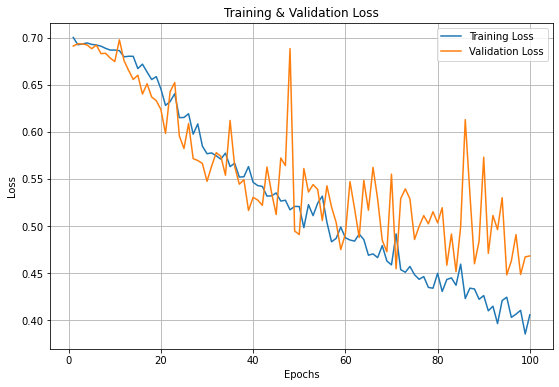

In [17]:
import matplotlib.pyplot as plt 

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6)) 
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend(['Training Loss', 'Validation Loss']) 
plt.grid() 
plt.show()

* Accuracy Visualization

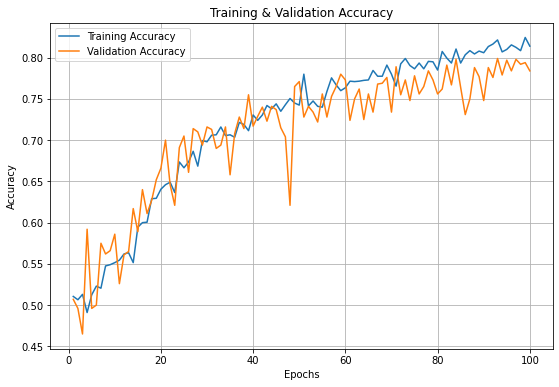

In [18]:
import matplotlib.pyplot as plt 

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6)) 
plt.plot(epochs, Hist_dandc.history['accuracy']) 
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend(['Training Accuracy', 'Validation Accuracy']) 
plt.grid() 
plt.show()

### 5) Model Evaluate
* test_generator

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255) 

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [20]:
loss, accuracy = model.evaluate(test_generator, 
                                steps = 50)

print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 54ms/step - loss: 0.4959 - accuracy: 0.7920
Loss = 0.49592
Accuracy = 0.79200


## 4.Model Save & Load to Google Drive

### 1) Google Drive Mount

In [21]:
from google.colab import drive 

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2) Model Save

In [22]:
model.save('/content/drive/My Drive/Colab Notebooks/models/003_dogs_and_cats_augmentation.h5')

In [23]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 81088
-rw------- 1 root root    34592 Mar 17 07:50 001_Model_iris.h5
-rw------- 1 root root 41498896 Mar 23 02:25 002_dogs_and_cats_small.h5
-rw------- 1 root root 41499744 Mar 23 06:22 003_dogs_and_cats_augmentation.h5


### 3) Model Load

In [26]:
from keras.models import load_model 

model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/003_dogs_and_cats_augmentation.h5')

In [27]:
loss, accuracy = model_google.evaluate(test_generator, steps = 50)

print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 55ms/step - loss: 0.4959 - accuracy: 0.7920
Loss = 0.49592
Accuracy = 0.79200


본 내용은 2021/03/23(화)에 학습한 내용입니다.